# Multi-task Lasso

Multi-task learning means solving several regression problems at once. 

For example, if your goal is to predict movie ratings given by several critic. One method is to build a model for each critic, and other method is to identify a pattern across critics and output a predicted rating for each critic
Multi-task lasso fits multiple regression problems jointly by enforcing the constraint that the selected features to be the sample across task.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
coef.shape

(40, 30)

In [9]:
times = np.linspace(0, 2 * np.pi, n_tasks)
times

array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
       3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
       4.02768289, 4.1887902 , 4.34989752, 4.51100484, 4.67211215,
       4.83321947, 4.99432678, 5.1554341 , 5.31654141, 5.47764873,
       5.63875604, 5.79986336, 5.96097068, 6.12207799, 6.28318531])

In [11]:
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)
X

array([[ 1.11763244,  0.50185205,  1.08686349, ..., -0.72591809,
         2.15031079, -1.00470486],
       [ 1.08354852, -0.72169645, -0.87092327, ..., -1.26875101,
        -0.66794167, -0.56166056],
       [-0.01568797, -0.27110969, -1.49122783, ...,  1.60189879,
        -0.78830926, -0.87016316],
       ...,
       [-0.19210468, -0.14862038, -0.78147607, ...,  1.03256172,
        -0.71395291,  0.54514088],
       [-0.96564964, -0.18949958,  0.32383927, ...,  2.13010427,
         0.75127771,  0.29493474],
       [-0.33982117,  0.18213487,  1.35977189, ..., -0.13268178,
        -0.3220614 ,  0.4710804 ]])

In [12]:
Y

array([[ 0.36613069,  0.68229181,  0.24321553, ..., -1.20157823,
        -2.24348884, -2.85495597],
       [ 1.96098845,  1.00712844,  1.8191221 , ...,  0.51430616,
         1.99547301, -1.08216001],
       [ 1.35779308,  0.14738083,  1.63618795, ..., -0.72116962,
         0.10169212,  1.15154191],
       ...,
       [-0.26214608, -0.45403045, -0.62286693, ...,  0.74481661,
         0.39752227,  2.0331702 ],
       [ 3.9542623 ,  2.25726113,  1.58952993, ..., -1.36092176,
        -3.11993007, -1.78169832],
       [-1.60693726, -0.67927607,  0.1125153 , ..., -1.17228614,
        -1.82765942,  0.05008676]])

In [ ]:
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

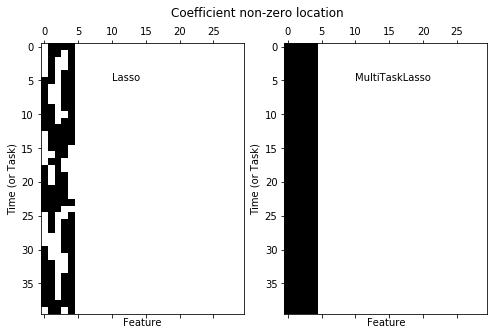

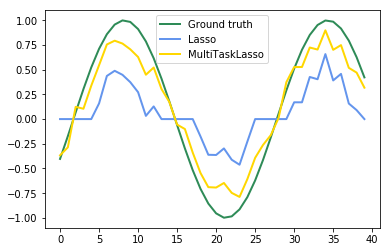

In [3]:
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()